In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl

from IPython.core.display import display, HTML

In [3]:
data =  pd.read_csv('C:/Users/yugan/Documents/Artificial Intelligence/Boston.csv')
data.head(n=5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
boston=data.drop('Unnamed: 0', axis=1)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston.shape

(506, 14)

In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
boston.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Visualization

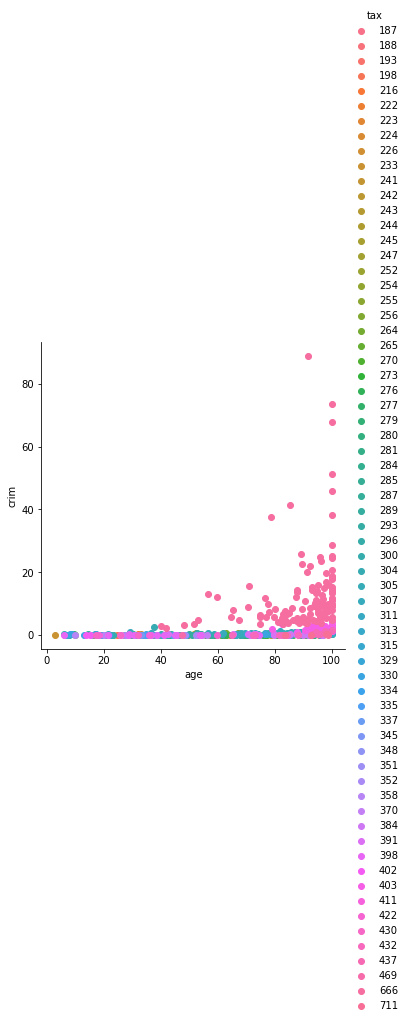

In [20]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(boston,hue='tax',size=5)\
.map(plt.scatter,'age','crim')\
.add_legend()

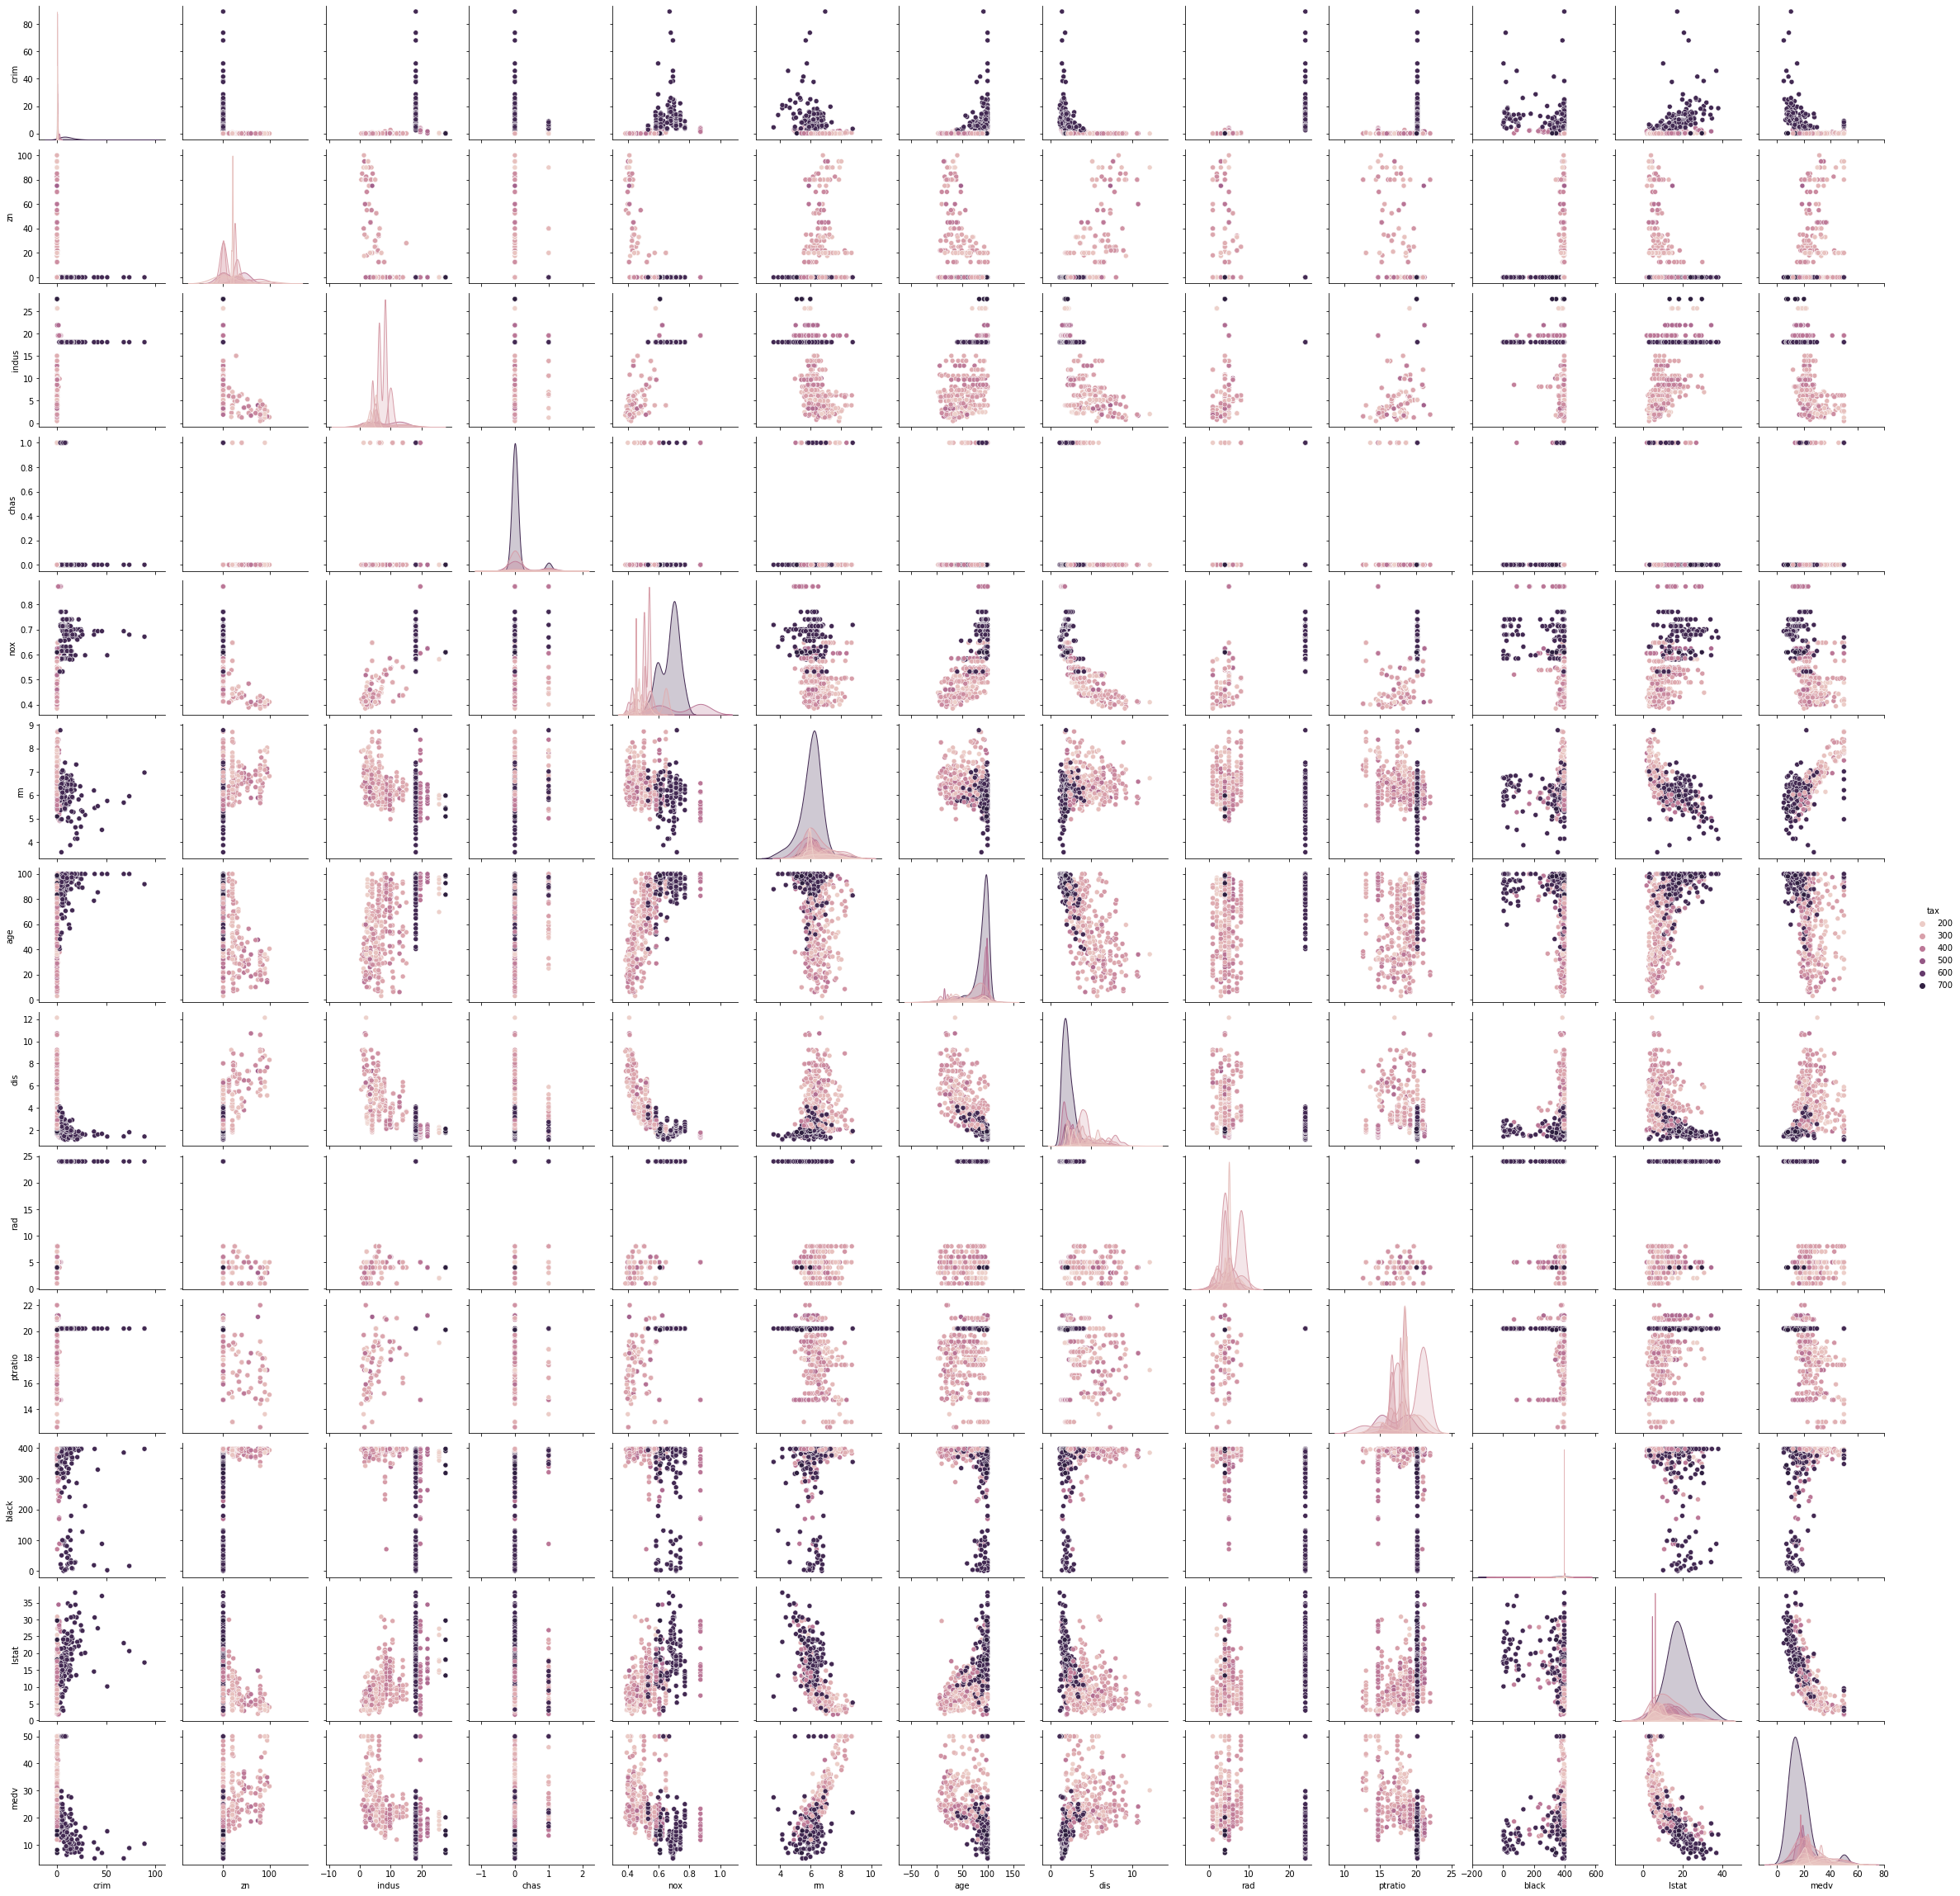

In [24]:
sns.pairplot(boston,hue='tax')

In [37]:
X = boston.iloc[:, :-5].values   
y = boston.iloc[:, -5].values 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Decision Tree Algorithm

In [39]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print(classification_report(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         187       0.00      0.00      0.00         0
         188       1.00      1.00      1.00         1
         193       1.00      1.00      1.00         1
         198       0.00      0.00      0.00         1
         222       1.00      1.00      1.00         3
         224       0.25      1.00      0.40         1
         226       0.00      0.00      0.00         1
         233       1.00      1.00      1.00         3
         242       1.00      1.00      1.00         1
         243       0.50      1.00      0.67         1
         244       0.00      0.00      0.00         0
         254       1.00      1.00      1.00         2
         256       0.00      0.00      0.00         0
         265       0.00      0.00      0.00         0
         270       1.00      1.00      1.00         1
         273       1.00      1.00      1.00         2
         276       1.00      1.00      1.00         3
         277       1.00    

# SVM Algorithm

In [40]:
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print(classification_report(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         188       0.00      0.00      0.00         1
         193       0.00      0.00      0.00         1
         198       0.00      0.00      0.00         1
         222       0.00      0.00      0.00         3
         224       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         233       0.00      0.00      0.00         3
         242       0.00      0.00      0.00         1
         243       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         0
         254       0.00      0.00      0.00         2
         264       0.00      0.00      0.00         0
         270       0.00      0.00      0.00         1
         273       0.00      0.00      0.00         2
         276       0.00      0.00      0.00         3
         277       0.00      0.00      0.00         5
         279       0.00      0.00      0.00         1
         284       0.00    